# Лабораторная работа №2
### Глобальная оптимизация

## Постановка задачи

0)	Развернуть и протестировать работу pygmo

1)	Найти оптимумы тестовых функций лабы 1  с помощью двух алгоритмов этой библиотеки

2)	Сконструировать нефункциональную(алгоритмическую) проблему оптимизации и решить в pygmo 

In [1]:
# Загрузка стандартных модулей
import math
from typing import Tuple, Mapping

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
import numpy as np
from numpy import random

# Загрузим pigmo
import pygmo as pg

## Функция Химмельблау
$$ f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2 $$

In [3]:
#функция 1
class HimmelblauOptimization:

    def __init__(self,
                 x_min: float,
                 x_max: float,
                 y_min: float,
                 y_max: float):

        # Задайте входные аргументы в качестве атрибутов, представляющих границы 
        # задачи для обеих проектных переменных
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max

    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])

    def fitness(self, x):
        # Вычислить значение функции
        function_value = math.pow(x[0] * x[0] + x[1] - 11.0, 2.0) + math.pow(x[0] + x[1] * x[1] - 7.0, 2.0)

        # Вернуть список
        return [function_value]


In [4]:
# Инициализируем UDP (User Defined Problem)
udp = HimmelblauOptimization(-5.0, 5.0, -5.0, 5.0)

# Создадим объект pygmo
prob = pg.problem(udp)

# Информация задачи
print(prob)

Problem name: <class '__main__.HimmelblauOptimization'>
	C++ class name: class pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5]
	Upper bounds: [5, 5]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [5]:
# Количество поколений
number_of_generations = 1

# Фиксированный сид
current_seed = 171015

# Создание объекта дифференциальной эволюции, передав количество поколений в качестве входных данных
de_algo = pg.de(gen=number_of_generations, seed=current_seed)

# Создадим объект-алгоритм pygmo
algo = pg.algorithm(de_algo)

# Информация алгоритма
print(algo)

Algorithm name: DE: Differential Evolution [stochastic]
	C++ class name: class pagmo::de

	Thread safety: basic

Extra info:
	Generations: 1
	Parameter F: 0.800000
	Parameter CR: 0.900000
	Variant: 2
	Stopping xtol: 0.000001
	Stopping ftol: 0.000001
	Verbosity: 0
	Seed: 171015


In [6]:
# Размер популяции
pop_size = 1000

# Создадим популяцию
pop = pg.population(prob, size=pop_size, seed=current_seed)

# Изучим популяцию (ДОЛГО)
inspect_pop = False
if inspect_pop:
    print(pop)

In [7]:
# Количество Эволюций
number_of_evolutions = 100

# Пустые контейнеры
individuals_list = []
fitness_list = []

# Произведём эволюцию несколько раз
for i in range(number_of_evolutions):
    pop = algo.evolve(pop)
    individuals_list.append(pop.get_x()[pop.best_idx()])
    fitness_list.append(pop.get_f()[pop.best_idx()])

# Выведем наилучшие образцы
print('\n########### ВЫВОД ДАННЫХ О ЧЕМПИОНЕ ###########\n')
print('Fitness (= function) value: ', pop.champion_f)
print('Decision variable vector: ', pop.champion_x)
print('Number of function evaluations: ', pop.problem.get_fevals())
print('Difference wrt the minimum: ', pop.champion_x - np.array([3,2]))


########### ВЫВОД ДАННЫХ О ЧЕМПИОНЕ ###########

Fitness (= function) value:  [2.86088661e-09]
Decision variable vector:  [2.99999955 1.99998731]
Number of function evaluations:  101000
Difference wrt the minimum:  [-4.51868224e-07 -1.26923844e-05]


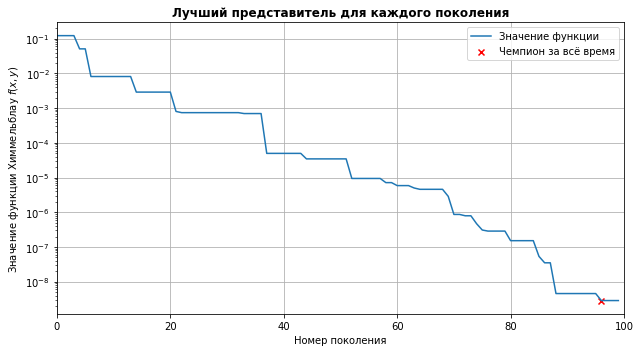

In [8]:
# Вытащим лучших индивидов из всех поколений
best_x = [ind[0] for ind in individuals_list]
best_y = [ind[1] for ind in individuals_list]

# Выразим границы задачи
(x_min, y_min), (x_max, y_max) = udp.get_bounds()

# Изобразим минимизацию за все поколения
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(np.arange(0, number_of_evolutions), fitness_list, label='Значение функции')

# Выведем лучший образец
champion_n = np.argmin(np.array(fitness_list))
ax.scatter(champion_n, np.min(fitness_list), marker='x', color='r', label='Чемпион за всё время')

# Оформление
ax.set_xlim((0, number_of_evolutions))
ax.grid('major')
ax.set_title('Лучший представитель для каждого поколения', fontweight='bold')
ax.set_xlabel('Номер поколения')
ax.set_ylabel(r'Значение функции Химмельблау $f(x,y)$')
ax.legend(loc='upper right')
ax.set_yscale('log')
plt.tight_layout()

# Показ
plt.show()

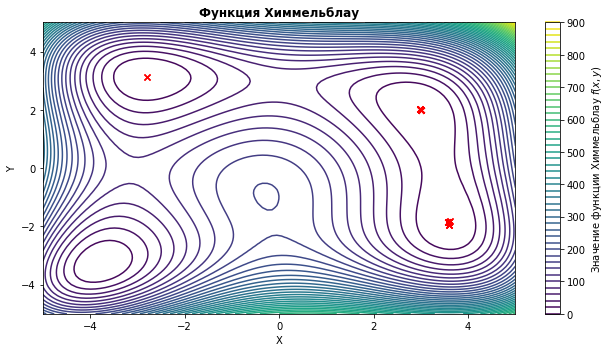

In [9]:
# Изобразим функцию Химмельблау
grid_points = 100
x_vector = np.linspace(x_min, x_max, grid_points)
y_vector = np.linspace(y_min, y_max, grid_points)
x_grid, y_grid = np.meshgrid(x_vector, y_vector)
z_grid = np.zeros((grid_points, grid_points))
for i in range(x_grid.shape[1]):
    for j in range(x_grid.shape[0]):
        z_grid[i, j] = udp.fitness([x_grid[i, j], y_grid[i, j]])[0]

# Create figure
fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(x_grid, y_grid, z_grid, 50)

# Показываем лучших представителей за каждое поколение
ax.scatter(best_x, best_y, marker='x', color='r')

# Оформление
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
ax.set_title('Функция Химмельблау', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r'Значение функции Химмельблау $f(x,y)$')
plt.tight_layout()

# Показ
plt.show()

## Функция Экли
$$ f(x, y) = -20.0 * exp(-0.2*sqrt(0.5*(x^2 + y^2))) - exp(0.5 * (cos(2pi * x) + cos(2 * pi * y)))+e +20  $$

In [2]:
#функция 2
class  AkluOptimization:

    def __init__(self,
                 x_min: float,
                 x_max: float,
                 y_min: float,
                 y_max: float):

        # Задайте входные аргументы в качестве атрибутов, представляющих границы 
        # задачи для обеих проектных переменных
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max

    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])

    def fitness(self, x):
        # Вычислить значение функции
        function_value = -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (np.square(x[0]) +np.square(x[1])))) - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + np.e + 20
        # Вернуть список
        return [function_value]


In [4]:
# Инициализируем UDP (User Defined Problem)
udp = AkluOptimization(-5.0, 5.0, -5.0, 5.0)

# Создадим объект pygmo
prob = pg.problem(udp)

# Информация задачи
print(prob)

Problem name: <class '__main__.AkluOptimization'>
	C++ class name: class pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5]
	Upper bounds: [5, 5]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [11]:
# Количество поколений
number_of_generations = 1

# Фиксированный сид
current_seed = 171

# Создание объекта дифференциальной эволюции, передав количество поколений в качестве входных данных
de_algo = pg.de(gen=number_of_generations, seed=current_seed)

# Создадим объект-алгоритм pygmo
algo = pg.algorithm(de_algo)

# Информация алгоритма
print(algo)

Algorithm name: DE: Differential Evolution [stochastic]
	C++ class name: class pagmo::de

	Thread safety: basic

Extra info:
	Generations: 1
	Parameter F: 0.800000
	Parameter CR: 0.900000
	Variant: 2
	Stopping xtol: 0.000001
	Stopping ftol: 0.000001
	Verbosity: 0
	Seed: 171


In [12]:
# Размер популяции
pop_size = 1000

# Создадим популяцию
pop = pg.population(prob, size=pop_size, seed=current_seed)

# Изучим популяцию (ДОЛГО)
inspect_pop = False
if inspect_pop:
    print(pop)

In [14]:
# Количество Эволюций
number_of_evolutions = 100

# Пустые контейнеры
individuals_list = []
fitness_list = []

# Произведём эволюцию несколько раз
for i in range(number_of_evolutions):
    pop = algo.evolve(pop)
    individuals_list.append(pop.get_x()[pop.best_idx()])
    fitness_list.append(pop.get_f()[pop.best_idx()])

# Выведем наилучшие образцы
print('\n########### ВЫВОД ДАННЫХ О ЧЕМПИОНЕ ###########\n')
print('Fitness (= function) value: ', pop.champion_f)
print('Decision variable vector: ', pop.champion_x)
print('Number of function evaluations: ', pop.problem.get_fevals())
print('Difference wrt the minimum: ', pop.champion_x - np.array([0,0]))


########### ВЫВОД ДАННЫХ О ЧЕМПИОНЕ ###########

Fitness (= function) value:  [0.]
Decision variable vector:  [2.24353854e-16 2.96752865e-16]
Number of function evaluations:  201000
Difference wrt the minimum:  [2.24353854e-16 2.96752865e-16]


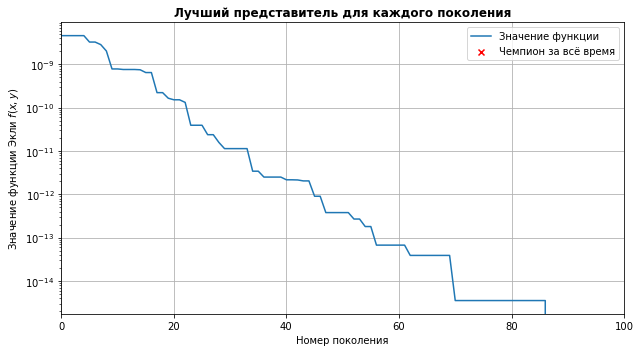

In [16]:
# Вытащим лучших индивидов из всех поколений
best_x = [ind[0] for ind in individuals_list]
best_y = [ind[1] for ind in individuals_list]

# Выразим границы задачи
(x_min, y_min), (x_max, y_max) = udp.get_bounds()

# Изобразим минимизацию за все поколения
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(np.arange(0, number_of_evolutions), fitness_list, label='Значение функции')

# Выведем лучший образец
champion_n = np.argmin(np.array(fitness_list))
ax.scatter(champion_n, np.min(fitness_list), marker='x', color='r', label='Чемпион за всё время')

# Оформление
ax.set_xlim((0, number_of_evolutions))
ax.grid('major')
ax.set_title('Лучший представитель для каждого поколения', fontweight='bold')
ax.set_xlabel('Номер поколения')
ax.set_ylabel(r'Значение функции Экли $f(x,y)$')
ax.legend(loc='upper right')
ax.set_yscale('log')
plt.tight_layout()

# Показ
plt.show()

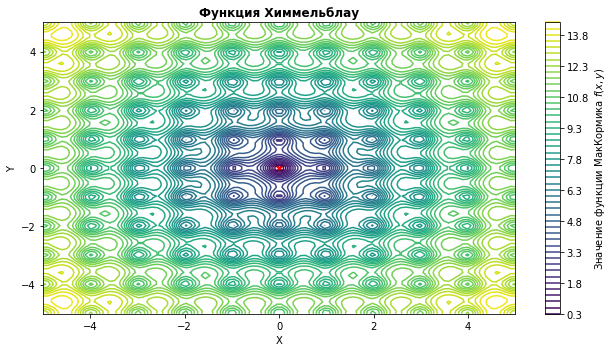

In [17]:
# Изобразим функцию Экли
grid_points = 100
x_vector = np.linspace(x_min, x_max, grid_points)
y_vector = np.linspace(y_min, y_max, grid_points)
x_grid, y_grid = np.meshgrid(x_vector, y_vector)
z_grid = np.zeros((grid_points, grid_points))
for i in range(x_grid.shape[1]):
    for j in range(x_grid.shape[0]):
        z_grid[i, j] = udp.fitness([x_grid[i, j], y_grid[i, j]])[0]

# Create figure
fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(x_grid, y_grid, z_grid, 50)

# Показываем лучших представителей за каждое поколение
ax.scatter(best_x, best_y, marker='x', color='r')

# Оформление
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
ax.set_title('Функция Химмельблау', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r'Значение функции МакКормика $f(x,y)$')
plt.tight_layout()

# Показ
plt.show()